# 3장. 데이터 측정
- nls97 데이터 : 패널(Panel)데이터, 종단데이터이며 동일한 개체에 대해 일정 기간의 데이터를 수집한 것
    - 각 개인에 대해 1997년부터 2017년까지 21년간 수집한 데이터

In [1]:
import pandas as pd
import numpy as np

nls97 = pd.read_csv("data/nls97.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", 
                         parse_dates=['lastdate'])

#parse_date 매개변수는 어떤 열을 날짜로 파싱할지 지정 : lastdate열은 날짜와 시간 객체로 변환됨

In [2]:
nls97.set_index('personid', inplace = True)
nls97.head()

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100284,Male,11,1984,7.0,Never-married,1.0,0.0,58000.0,None,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100292,Male,4,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN,NaN,NaN,NaN
100583,Male,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [4]:
nls97.shape

(8984, 88)

In [7]:
nls97.index.nunique()

8984

In [8]:
nls97.info()
#null 값 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

In [9]:
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13.0,12.0
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [10]:
covidtotals.set_index('iso_code', inplace = True)

In [11]:
covidtotals.index

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=210)

In [12]:
covidtotals.shape

(210, 11)

In [13]:
covidtotals.index.nunique()

210

In [14]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 27.8+ KB


In [15]:
covidtotals.sample(2, random_state=1).T
#random_state 매개변수를 지정해 호출하면, 함수 실행할 때마다 같은 결과를 얻음
#행과 열을 전치하면, 열의 수가 많아도 모든 열을 볼 수 있음!

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


### 열을 선택하고 정돈하기
- 데이터를 정제하거나 탐색적 혹은 통계적 분석을 할 때는 당면한 이슈나 분석에 관련된 변수에 집중하는 것이 좋음
- 열을 실체적 혹은 통계적 관계에 따라 그룹화하거나 한 번에 한 열씩 선택해 조사하는 것이 중요함
- 직관을 얻으려면 한 번에 다루는 데이터 양이 인식범위를 넘지 않아야 함!

In [16]:
#객체 자료형을 선택 -> category 자료형으로 바꾸기
nls97.loc[:, nls97.dtypes == 'object'] = nls97.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [24]:
nls97.loc[:, nls97.dtypes == 'object'] = nls97.select_dtypes(['object']).apply(lambda x : x.astype('category'))

In [18]:
analysisdemo = nls97['gender']
type(analysisdemo)
#시리즈 반환 확인

pandas.core.series.Series

In [19]:
analysisdemo = nls97[['gender']]
type(analysisdemo)
#데이터프레임 반환 확인

pandas.core.frame.DataFrame

In [20]:
analysisdemo = nls97.loc[:,['gender']]
type(analysisdemo)

pandas.core.frame.DataFrame

In [21]:
analysisdemo = nls97.iloc[:, [0]]
type(analysisdemo)

pandas.core.frame.DataFrame

In [106]:
nls97.columns

Index(['gender', 'birthmonth', 'birthyear', 'highestgradecompleted',
       'maritalstatus', 'childathome', 'childnotathome', 'wageincome',
       'weeklyhrscomputer', 'weeklyhrstv', 'nightlyhrssleep', 'satverbal',
       'satmath', 'gpaoverall', 'gpaenglish', 'gpamath', 'gpascience',
       'highestdegree', 'govprovidejobs', 'govpricecontrols', 'govhealthcare',
       'govelderliving', 'govindhelp', 'govunemp', 'govincomediff',
       'govcollegefinance', 'govdecenthousing', 'govprotectenvironment',
       'weeksworked00', 'weeksworked01', 'weeksworked02', 'weeksworked03',
       'weeksworked04', 'weeksworked05', 'weeksworked06', 'weeksworked07',
       'weeksworked08', 'weeksworked09', 'weeksworked10', 'weeksworked11',
       'weeksworked12', 'weeksworked13', 'weeksworked14', 'weeksworked15',
       'weeksworked16', 'weeksworked17', 'colenrfeb97', 'colenroct97',
       'colenrfeb98', 'colenroct98', 'colenrfeb99', 'colenroct99',
       'colenrfeb00', 'colenroct00', 'colenrfeb01', 'col

In [25]:
analysisdemo = nls97[['gender', 'maritalstatus', 'highestgradecompleted']]
analysisdemo.shape

(8984, 3)

In [26]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13.0
100139,Male,Married,12.0
100284,Male,Never-married,7.0
100292,Male,NaN,NaN
100583,Male,Married,13.0


In [27]:
#선택하려는 열이름 리스트를 별도로 생성
keyvars = ['gender', 'maritalstatus', 'highestgradecompleted', 'wageincome', 'gpaoverall']
anaylsiskeys = nls97[keyvars]

In [28]:
anaylsiskeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   highestgradecompleted  6663 non-null   float64 
 3   wageincome             5091 non-null   float64 
 4   gpaoverall             6004 non-null   float64 
dtypes: category(2), float64(3)
memory usage: 556.7 KB


In [30]:
#컬럼명 자체를 필터링하여 복수의 열 선택하기
#weeksworked가 포함된 열을 모두 선택
analysiswork = nls97.filter(like="weeksworked")
analysiswork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8490 non-null   float64
 4   weeksworked04  8458 non-null   float64
 5   weeksworked05  8403 non-null   float64
 6   weeksworked06  8340 non-null   float64
 7   weeksworked07  8272 non-null   float64
 8   weeksworked08  8186 non-null   float64
 9   weeksworked09  8146 non-null   float64
 10  weeksworked10  8054 non-null   float64
 11  weeksworked11  7968 non-null   float64
 12  weeksworked12  7747 non-null   float64
 13  weeksworked13  7680 non-null   float64
 14  weeksworked14  7612 non-null   float64
 15  weeksworked15  7389 non-null   float64
 16  weeksworked16  7068 non-null   float64
 17  weeksworked17  6670 non-null   float64
dtypes

In [32]:
#범주형인 열 모두 선택 =>> 자료형을 기준으로 열 선택하려면 select_dtypes()
analysiscats = nls97.select_dtypes(include = ['category'])
analysisnums = nls97.select_dtypes(include = ['number'])
analysisnums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   birthmonth             8984 non-null   int64  
 1   birthyear              8984 non-null   int64  
 2   highestgradecompleted  6663 non-null   float64
 3   childathome            4791 non-null   float64
 4   childnotathome         4791 non-null   float64
 5   wageincome             5091 non-null   float64
 6   nightlyhrssleep        6706 non-null   float64
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 1

### 행 선택

In [33]:
df = nls97.copy()

In [39]:
df[1000:1004:2].T # 2행식 건너뜀
df[:3].T # df.head(3)와 같음

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13.0,12.0,7.0
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [41]:
df[-3:] #df.tail(3)과 동일

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
999543,Female,8,1984,12.0,Divorced,2.0,0.0,NaN,None,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
999698,Female,5,1983,12.0,Never-married,5.0,0.0,NaN,4 to 6 hours a week,More than 40 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
999963,Female,9,1982,17.0,Married,2.0,0.0,50000.0,4 to 6 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [44]:
df.loc[[195884, 195891, 195970]]
df.loc[195884:195970] #위와 동일한 결과

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
195884,Male,12,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195891,Male,9,1980,12.0,Never-married,NaN,NaN,14000.0,Less than 1 hour a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
195970,Female,3,1982,17.0,Never-married,2.0,0.0,52000.0,10 hours or more a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [50]:
df.iloc[[0, 1, 2]].T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13.0,12.0,7.0
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [52]:
df.nightlyhrssleep.quantile(0.05)

4.0

In [54]:
df.nightlyhrssleep.count()

6706

In [58]:
sleepcheckbool = df.nightlyhrssleep <= 4
sleepcheckbool

lowsleep = df.loc[sleepcheckbool]
lowsleep.shape

(364, 88)

In [59]:
lowsleep.childathome.describe()

count    293.000000
mean       1.788396
std        1.400685
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: childathome, dtype: float64

In [61]:
df.loc[(df.nightlyhrssleep <= 4) & (df.childathome >= 3), ['nightlyhrssleep', 'childathome']]

,nightlyhrssleep,childathome
personid,,
119754,4.0,4.0
141531,4.0,5.0
152706,4.0,4.0
156823,1.0,3.0
158355,4.0,4.0
...,...,...
905774,4.0,3.0
907315,4.0,3.0
955166,3.0,3.0


### 범주형 변수 빈도 생성

In [67]:
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x : x.astype('category'))

In [69]:
catcols = df.select_dtypes(include = ['category']).columns
df[catcols].isnull().sum()

gender                      0
maritalstatus            2312
weeklyhrscomputer        2274
weeklyhrstv              2273
highestdegree              31
govprovidejobs           7151
govpricecontrols         7125
govhealthcare            7110
govelderliving           7112
govindhelp               7169
govunemp                 7173
govincomediff            7209
govcollegefinance        7109
govdecenthousing         7137
govprotectenvironment    7124
colenrfeb97              7734
colenroct97               483
colenrfeb98               483
colenroct98                96
colenrfeb99               119
colenroct99               133
colenrfeb00               164
colenroct00               179
colenrfeb01               198
colenroct01               226
colenrfeb02               252
colenroct02               286
colenrfeb03               326
colenroct03               362
colenrfeb04               406
colenroct04               438
colenrfeb05               476
colenroct05               513
colenrfeb0

In [71]:
df.maritalstatus.value_counts()

Married          3066
Never-married    2766
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [72]:
# 빈도순 정렬 해제
df.maritalstatus.value_counts(sort = False)

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [73]:
# 빈도를 비율로
df.maritalstatus.value_counts(sort = False, normalize = True)

Divorced         0.099371
Married          0.459532
Never-married    0.414568
Separated        0.023082
Widowed          0.003447
Name: maritalstatus, dtype: float64

In [74]:
# 정부 책임 관련 열 전체를 비율로 표시
df.filter(like='gov').apply(pd.value_counts, normalize = True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.247681,0.541689,0.665422,0.700321,0.428650,0.218112,0.324507,0.734400,0.442339,0.668817
2. Probably,0.336607,0.334051,0.271078,0.247863,0.411019,0.403092,0.284507,0.230400,0.433676,0.286559
3. Probably not,0.252046,0.086606,0.045358,0.037927,0.119008,0.262838,0.228732,0.026667,0.100162,0.029570
4. Definitely not,0.163666,0.037655,0.018143,0.013889,0.041322,0.115958,0.162254,0.008533,0.023822,0.015054


In [78]:
# 정부 책임 관련 열에서 기혼자만 찾기
df[df.maritalstatus == 'Married'].filter(like='gov').apply(pd.value_counts, normalize = True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.173315,0.459864,0.564450,0.632293,0.372549,0.147265,0.258890,0.695418,0.356354,0.644505
2. Probably,0.328748,0.380952,0.359566,0.310719,0.445378,0.395512,0.273115,0.261456,0.493094,0.313433
3. Probably not,0.314993,0.112925,0.051560,0.037992,0.142857,0.328191,0.284495,0.033693,0.120166,0.028494
4. Definitely not,0.182944,0.046259,0.024423,0.018996,0.039216,0.129032,0.183499,0.009434,0.030387,0.013569


### 연속형

In [82]:
import matplotlib.pyplot as plt

covidtotals = pd.read_csv('./data/covidtotals.csv', parse_dates = ['lastdate'])
covidtotals.set_index('iso_code', inplace = True)

In [83]:
covidtotals.sample(2, random_state = 1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


In [84]:
covidtotals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [85]:
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,209.000000,209.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2629.894101,145.081876,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.894000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,96.785000,0.893000,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,281.997000,6.214000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1803.318000,32.158000,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


In [86]:
covidtotals.columns

Index(['lastdate', 'location', 'total_cases', 'total_deaths', 'total_cases_pm',
       'total_deaths_pm', 'population', 'pop_density', 'median_age',
       'gdp_per_capita', 'hosp_beds'],
      dtype='object')

In [88]:
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm',
       'total_deaths_pm']

covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


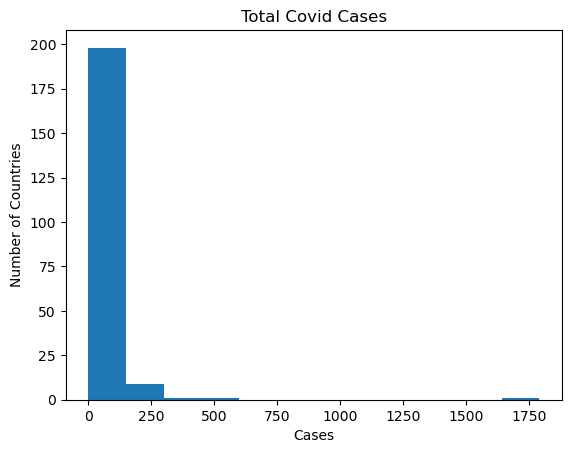

In [91]:
plt.hist(covidtotals['total_cases']/1000, bins = 12)
plt.title('Total Covid Cases')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()